**Veri setine erişmek için gereken bağımlılık**


In [10]:
!pip3 install -U ucimlrepo

# KARAR AĞACI

In [11]:
#Gerekli kütüphaneler import edilir
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# veri seti indirilir
chess_data = fetch_ucirepo(id=22) #id si 22 olan repo
X = chess_data.data.features # özellikler
y = chess_data.data.targets # sütunlar

# Bu satırı ekleyerek orijinal DataFrame'in tam bir kopyasını alıyoruz. Böylece veri setine zarar vermeden işlem yapılabilir.
X = X.copy()

# Kategorik verileri işleyebilmek için sayısal verilere dönüştürür.
label_encoders = {}
for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Target'ı dönüştür "won-nowin" yani
target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)

# Eğitim ve test olarak böl.
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=100)


# farklı algoritmalarda buraya kadar genelde aynıdır. buradan sonra kullanılan fonksiyonlar değişir.


# Karar ağacı modeli oluştur ve eğit
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Tahmin ve değerlendirme
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Recall, Precision ve F1-Score hesaplama
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Accuracy: 0.986444212721585

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       453
           1       0.99      0.99      0.99       506

    accuracy                           0.99       959
   macro avg       0.99      0.99      0.99       959
weighted avg       0.99      0.99      0.99       959

Precision: 0.9864479012659894
Recall: 0.986444212721585
F1-Score: 0.9864449814441795


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


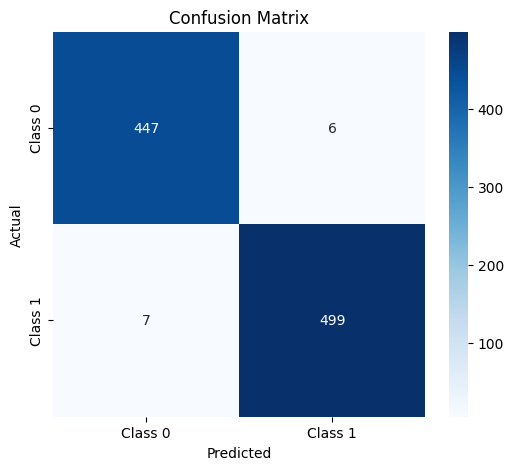

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix'i hesapla
cm = confusion_matrix(y_test, y_pred)

# Görselleştir
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [13]:

# aynı şeyleri yap ama testi %20 olarak belirle
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=100)


model = DecisionTreeClassifier()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.99375

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       295
           1       0.99      0.99      0.99       345

    accuracy                           0.99       640
   macro avg       0.99      0.99      0.99       640
weighted avg       0.99      0.99      0.99       640

Precision: 0.99375
Recall: 0.99375
F1-Score: 0.99375


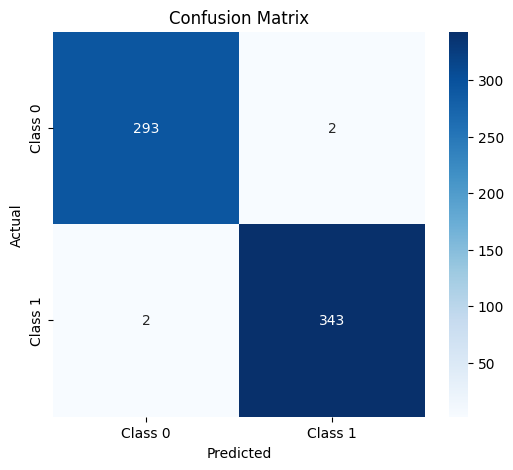

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix'i hesapla
cm = confusion_matrix(y_test, y_pred)

# Görselleştir
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


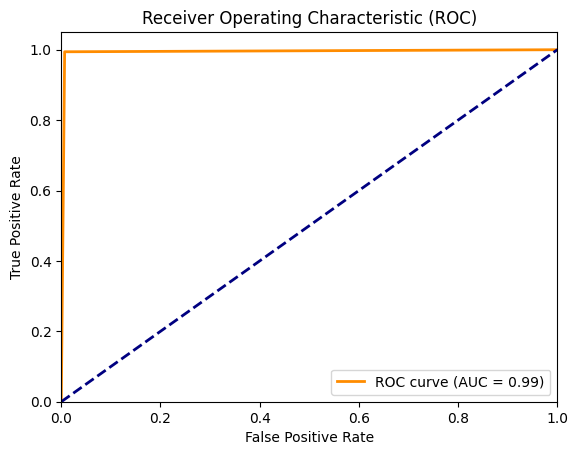

In [15]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Gerçek ve tahmin edilen olasılık değerleri
y_proba = model.predict_proba(X_test)[:, 1]  # Sınıf 1 için olasılık

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# ROC eğrisi çizimi
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


Accuracy: 0.986444212721585

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       453
           1       0.99      0.99      0.99       506

    accuracy                           0.99       959
   macro avg       0.99      0.99      0.99       959
weighted avg       0.99      0.99      0.99       959



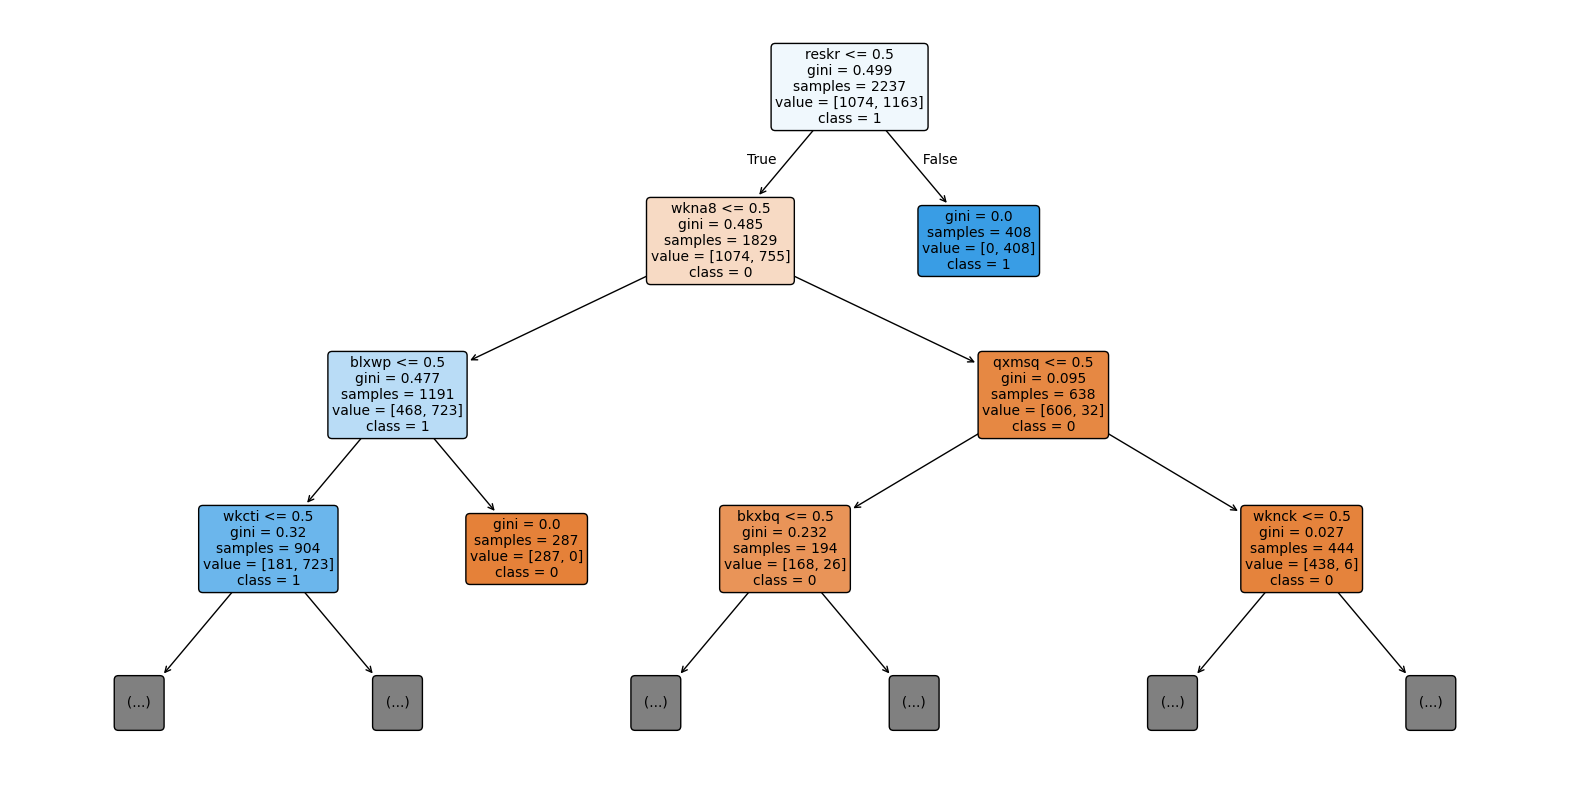

In [16]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt  # görselleştirme için ekledik


chess_data = fetch_ucirepo(id=22)
X = chess_data.data.features
y = chess_data.data.targets


X = X.copy()
label_encoders = {}
for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le


y = LabelEncoder().fit_transform(y.values.ravel())

# buraya kadar aynı yine
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Karar ağacı modeli oluştur ve eğit
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Tahmin ve değerlendirme
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Karar ağacını görselleştir (max_depth=3 sınırı koyarak sadece ilk 3 seviyeyi gösteriyoruz)
plt.figure(figsize=(20,10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=[str(cls) for cls in set(y)],
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=3  # Görselleştirme derinliğini 3 ile sınırlıyoruz -!!eğitim değil görselleştirme sınırlı!!-
)
plt.show()


# kNN

In [17]:

import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score


chess_data = fetch_ucirepo(id=22)
X = chess_data.data.features
y = chess_data.data.targets

X = X.copy()

label_encoders = {}
for col in X.columns:
    le = LabelEncoder()
    X.loc[:, col] = le.fit_transform(X[col])
    label_encoders[col] = le


y = LabelEncoder().fit_transform(y.values.ravel())

#buraya kadar aynı

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#farkı bir method kullanılır
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

#gerisi aynı

y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9363920750782064
Precision: 0.9320388349514563
Recall: 0.9486166007905138
F1-Score: 0.940254652301665

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       453
           1       0.93      0.95      0.94       506

    accuracy                           0.94       959
   macro avg       0.94      0.94      0.94       959
weighted avg       0.94      0.94      0.94       959



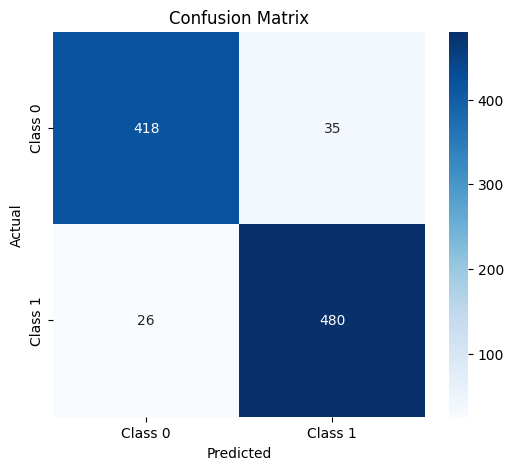

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix'i hesapla
cm = confusion_matrix(y_test, y_pred)

# Görselleştir
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [19]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9421875
Precision: 0.9502923976608187
Recall: 0.9420289855072463
F1-Score: 0.9461426491994177

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       295
           1       0.95      0.94      0.95       345

    accuracy                           0.94       640
   macro avg       0.94      0.94      0.94       640
weighted avg       0.94      0.94      0.94       640



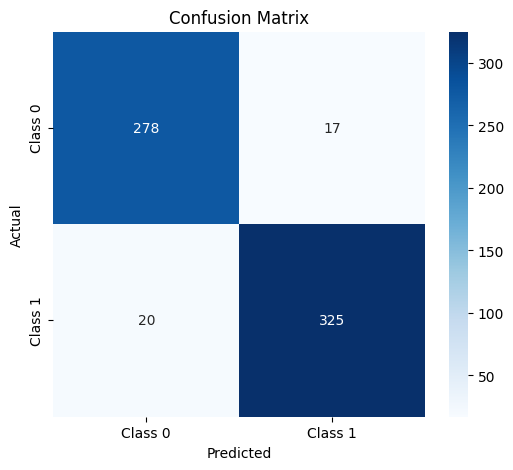

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix'i hesapla
cm = confusion_matrix(y_test, y_pred)

# Görselleştir
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# LOJİSTİK REGRESYON

In [21]:

import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score


chess_data = fetch_ucirepo(id=22)
X = chess_data.data.features.copy()
y = chess_data.data.targets


label_encoders = {}
for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le


y = LabelEncoder().fit_transform(y.values.ravel())

#buraya kadar aynı

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# farklı bir metot kullanılır . öğrenirken max 1000 defa tekrar eder
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# devamı aynı
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9374348279457768
Precision: 0.9372549019607843
Recall: 0.9446640316205533
F1-Score: 0.9409448818897638

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       453
           1       0.94      0.94      0.94       506

    accuracy                           0.94       959
   macro avg       0.94      0.94      0.94       959
weighted avg       0.94      0.94      0.94       959



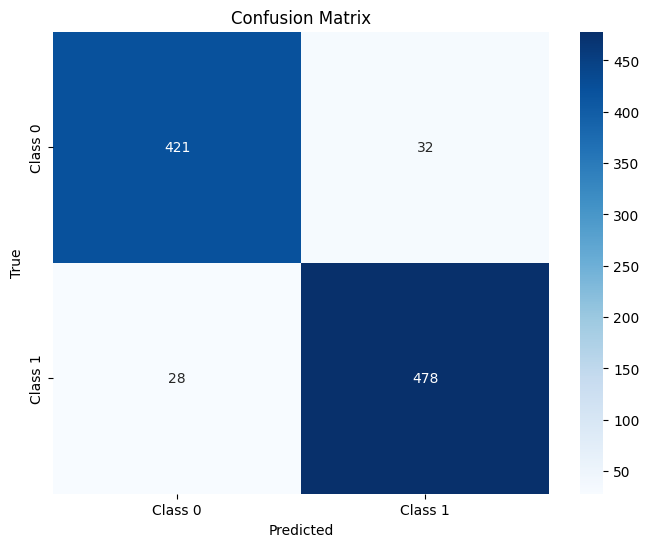

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt  # eksik olan satır

# Karışıklık matrisini hesapla
cm = confusion_matrix(y_test, y_pred)

# Karışıklık matrisini görselleştir
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [23]:

# Eğitim ve test olarak böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Lojistik regresyon modeli oluştur ve eğit
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Tahmin ve değerlendirme
y_pred = model.predict(X_test)

# Sonuçları yazdır
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Sonuçları yazdır
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9375
Precision: 0.9394812680115274
Recall: 0.9449275362318841
F1-Score: 0.9421965317919075

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       295
           1       0.94      0.94      0.94       345

    accuracy                           0.94       640
   macro avg       0.94      0.94      0.94       640
weighted avg       0.94      0.94      0.94       640



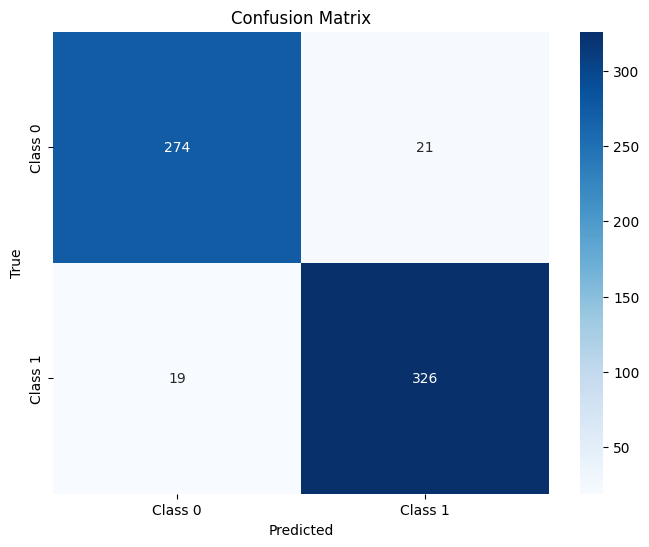

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt  # eksik olan satır

# Karışıklık matrisini hesapla
cm = confusion_matrix(y_test, y_pred)

# Karışıklık matrisini görselleştir
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
7 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1301, in fit
    raise ValueError(
ValueE

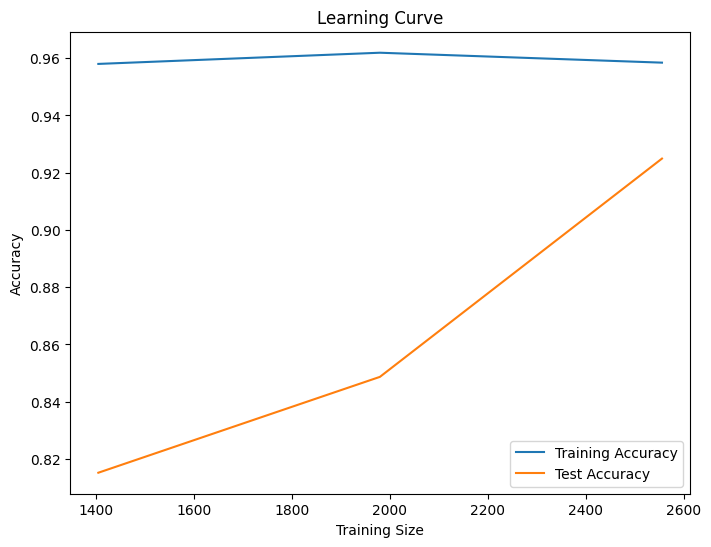

In [25]:
from sklearn.model_selection import learning_curve

# Learning curve hesapla
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# Learning curve görselleştirme
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Accuracy')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Test Accuracy')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()


# BAYES

In [26]:

import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score


chess_data = fetch_ucirepo(id=22)
X = chess_data.data.features
y = chess_data.data.targets


X = X.copy()


label_encoders = {}
for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le


y = LabelEncoder().fit_transform(y.values.ravel())

#buraya kadar aynı

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#farklı bir metot kullanılır
model = GaussianNB()
model.fit(X_train, y_train)
#devamı yine aynı

y_pred = model.predict(X_test)



print(f"Precision:",precision_score(y_test, y_pred, average='weighted'))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1-Score:", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Precision: 0.7449291636475719
Accuracy: 0.6319082377476538
Recall: 0.6115313806071077
F1-Score: 0.5607453109895741

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.24      0.38       453
           1       0.59      0.98      0.74       506

    accuracy                           0.63       959
   macro avg       0.75      0.61      0.56       959
weighted avg       0.74      0.63      0.57       959



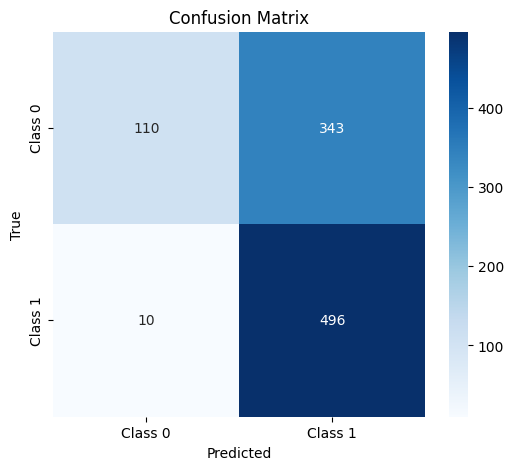

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [28]:



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


model = GaussianNB()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print(f"Precision:",precision_score(y_test, y_pred, average='weighted'))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1-Score:", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Precision: 0.7651657924912936
Accuracy: 0.628125
Recall: 0.5971014492753624
F1-Score: 0.5369424582907729

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.20      0.33       295
           1       0.59      0.99      0.74       345

    accuracy                           0.63       640
   macro avg       0.78      0.60      0.54       640
weighted avg       0.77      0.63      0.55       640



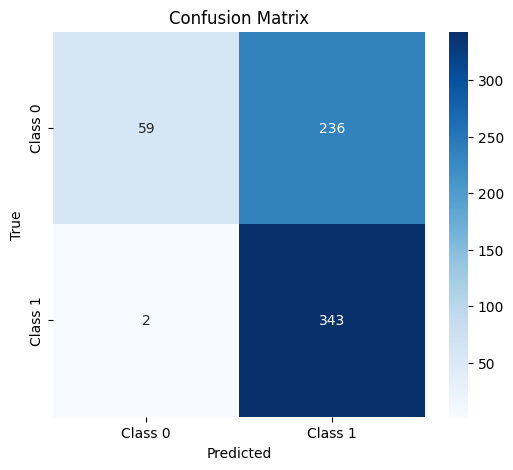

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# RASTGELE ORMAN

In [30]:

import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_score


chess_data = fetch_ucirepo(id=22)
X = chess_data.data.features.copy()
y = chess_data.data.targets


label_encoders = {}
for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le


y = LabelEncoder().fit_transform(y.values.ravel())

#buraya kadar aynı

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
#farklı bir metot ile eğitiir

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# devamı aynı

y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))  # macro precision
print("Recall:", recall_score(y_test, y_pred, average='macro'))  # macro recall
print("F1-Score:", f1_score(y_test, y_pred, average='macro'))    # macro f1-score
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9833159541188738
Precision: 0.9836649713366891
Recall: 0.9829180081843485
F1-Score: 0.9832525649421524

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       453
           1       0.98      0.99      0.98       506

    accuracy                           0.98       959
   macro avg       0.98      0.98      0.98       959
weighted avg       0.98      0.98      0.98       959



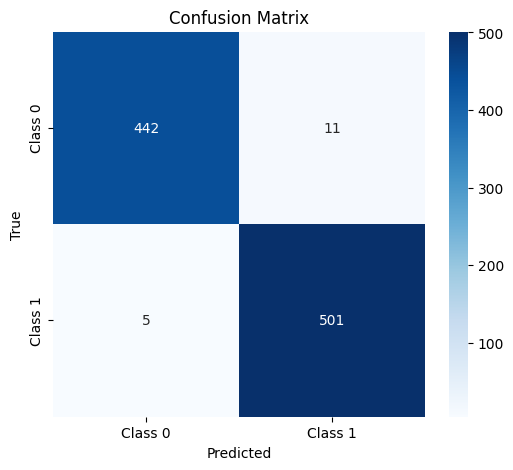

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


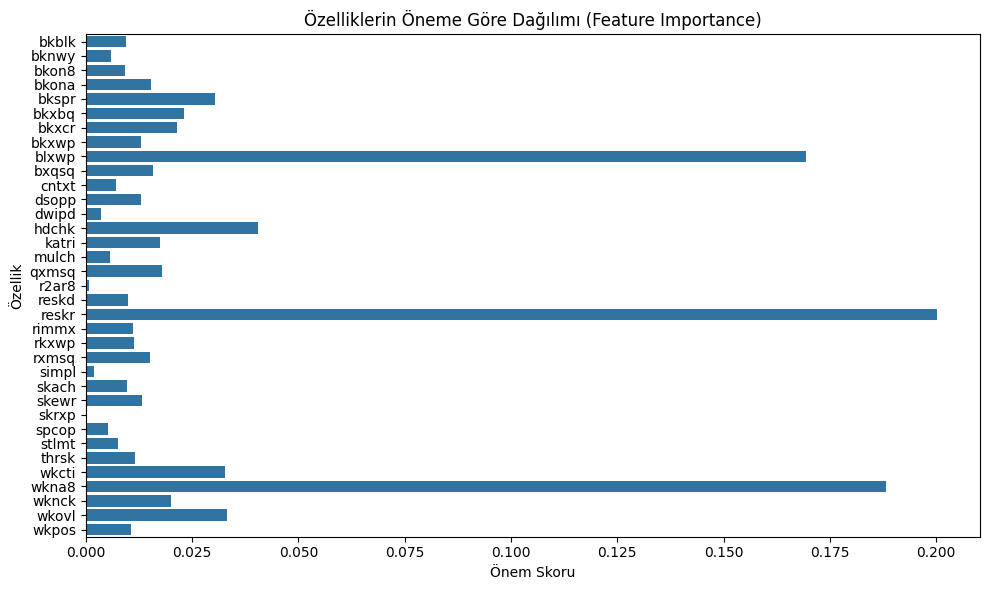

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns


importances = model.feature_importances_
feature_names = X.columns


plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Özelliklerin Öneme Göre Dağılımı (Feature Importance)")
plt.xlabel("Önem Skoru")
plt.ylabel("Özellik")
plt.tight_layout()
plt.show()


In [33]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1-Score:", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9875
Precision: 0.9876759351240767
Recall: 0.9871775976418571
F1-Score: 0.9874169320907553

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       295
           1       0.99      0.99      0.99       345

    accuracy                           0.99       640
   macro avg       0.99      0.99      0.99       640
weighted avg       0.99      0.99      0.99       640



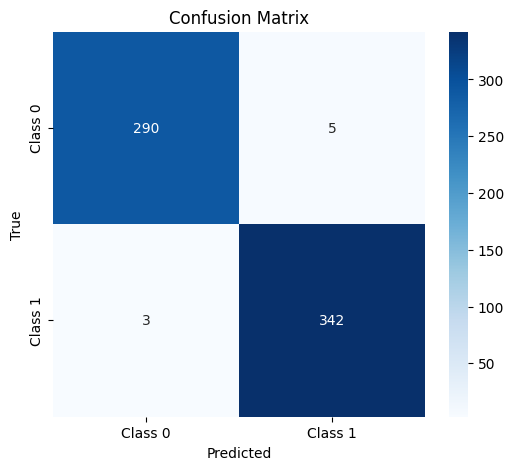

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


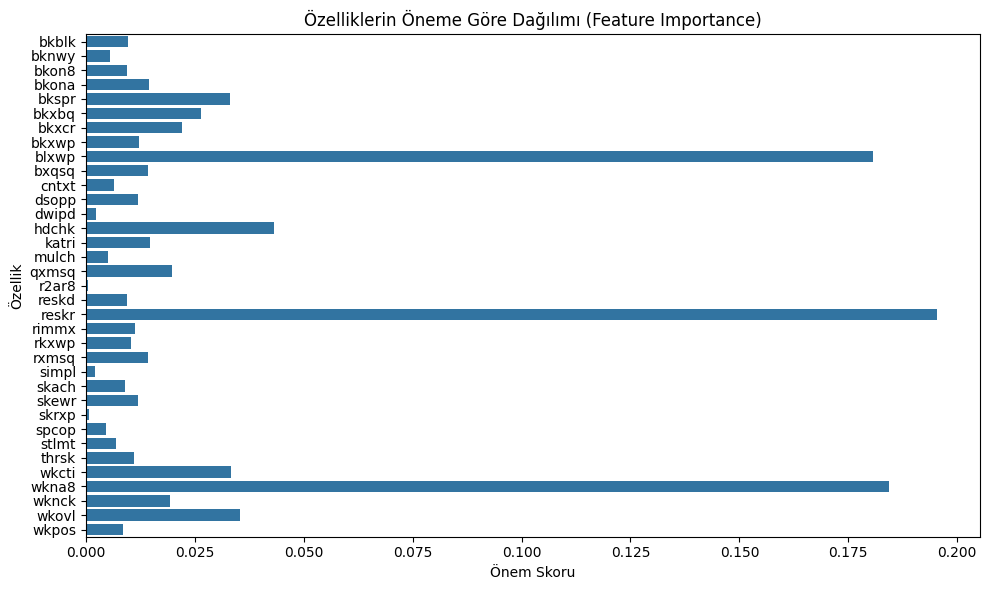

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns


importances = model.feature_importances_
feature_names = X.columns


plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Özelliklerin Öneme Göre Dağılımı (Feature Importance)")
plt.xlabel("Önem Skoru")
plt.ylabel("Özellik")
plt.tight_layout()
plt.show()
